In [1]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [2]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,54637,None,None,85824.578519
2020-06-13,54638,None,None,79712.938615
2020-06-14,54639,None,None,74044.961758
2020-06-15,54640,None,None,68705.083382
2020-06-16,54641,None,None,63946.494905
...,...,...,...,...
2021-05-03,54962,None,None,15143.701332
2021-05-04,54963,None,None,14979.779920
2021-05-05,54964,None,None,14970.082327


In [3]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-05-07_2021-05-07-13-10.pickle


In [4]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-05-06_2021-05-06-16-39.pickle


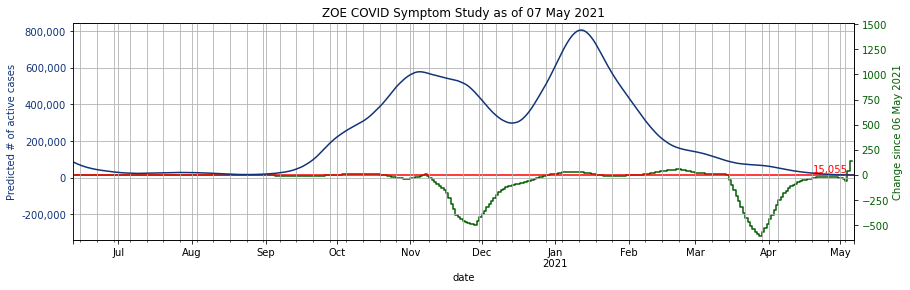

In [5]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

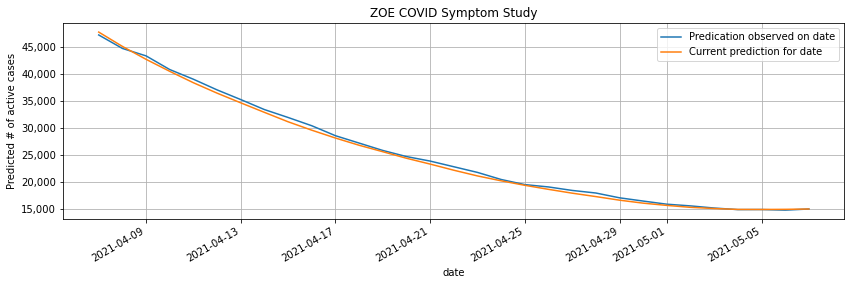

In [6]:
plot_study_evolution(curr_date, days=30)

In [7]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [8]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-05-07_2021-05-07-13-10.pickle


In [9]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
297,Falkirk,S12000014,0.313597
299,Wolverhampton,E08000031,0.261171
240,Wakefield,E08000036,0.235910
105,Erewash,E07000036,0.226599
324,East Dunbartonshire,S12000045,0.220665
323,North Lanarkshire,S12000044,0.152161
6,North East Derbyshire,E07000038,0.151591
5,York,E06000014,0.142144
266,Bolton,E08000001,0.120509
208,Craven,E07000163,0.110302
